<h2>Solutions MIP Ex. 2</h2>

<h3>Task 1: Contrast Enhancement</h3>

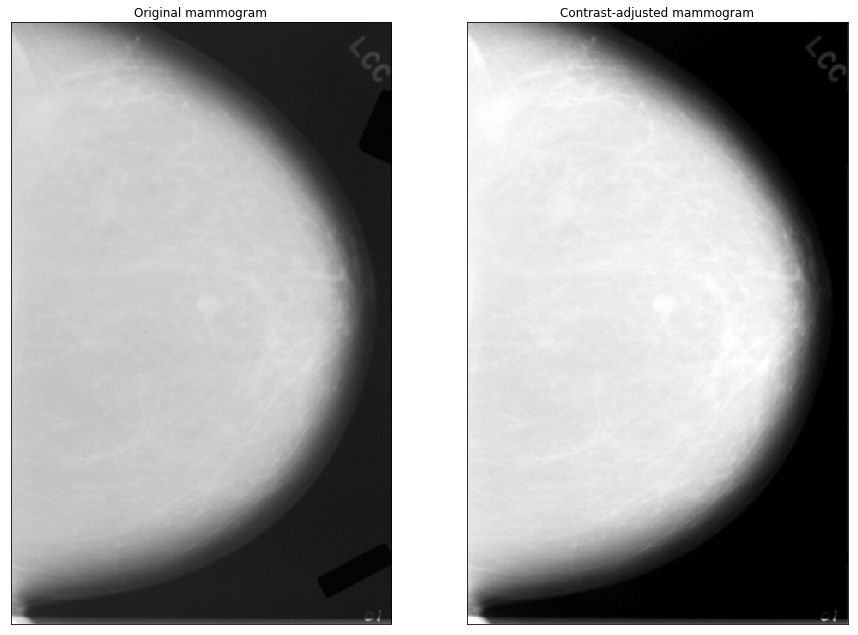

In [6]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt


pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('mammogram1.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
gain = 1.5
bias = -80

cimg = img*gain + bias
cimg = np.clip(cimg,0, 255)
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original mammogram'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Contrast-adjusted mammogram'), plt.xticks([]), plt.yticks([])
plt.show()

<h2>Task 2: Histogram Equalization and CLAHE</h2>

<strong style="color: red">Programming Task:</strong> Apply histogram equalization on the image mammogram1.png.

<strong>Hint: </strong> In OpenCV, it suffices to use the <code><a href="https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html?highlight=equalizehist#equalizehist">equalizeHist</a></code> function to apply histogram equalization to an image.

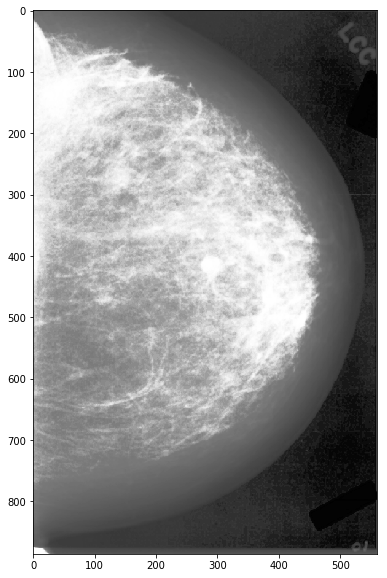

In [11]:
import cv2
import numpy as np
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (10.0, 10.0)
img = cv2.imread('mammogram1.png',0)

# YOUR CODE HERE
equ = cv2.equalizeHist(img)
plt.imshow(equ, cmap='gray')
plt.show()
# END OF YOUR CODE

<strong style="color: red">Programming Task: </strong> Load the color image Lenna.png and apply histogram equalization to the Y plane to enhance its contrast. Use the <code><a href="https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor">cvtColor</a></code> function to convert the image to the YCrCb color space.

In [37]:
a = [1,2,3,4,5]
a[1:]


[2, 3, 4, 5]

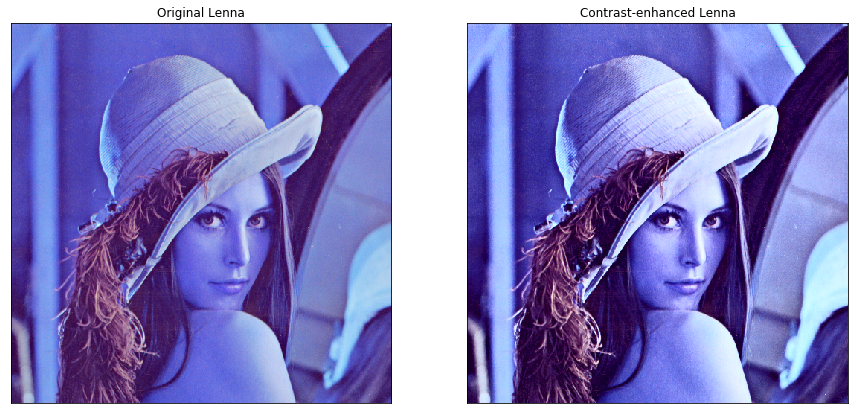

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('Lenna.png')

# YOUR CODE HERE
img_to_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# just take the Y
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YCrCb2BGR)
# END OF YOUR CODE

plt.subplot(121), plt.imshow(img[:,:,::-1])
plt.title('Original Lenna'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(hist_equalization_result)
plt.title('Contrast-enhanced Lenna'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task: </strong> Apply both simple histogram equalization and CLAHE to the cell.png and mammogram1.png images. Research online for the necessary OpenCV function to use, and adjust the function parameters to achieve best results.

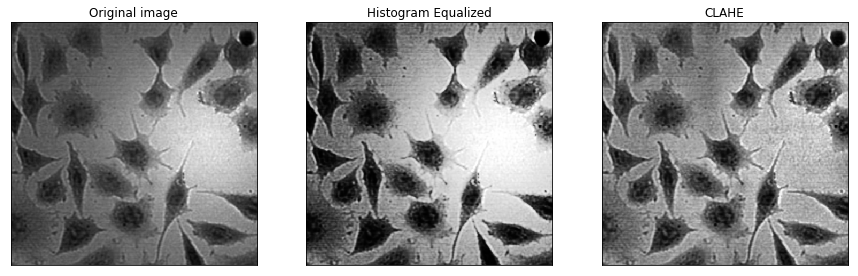

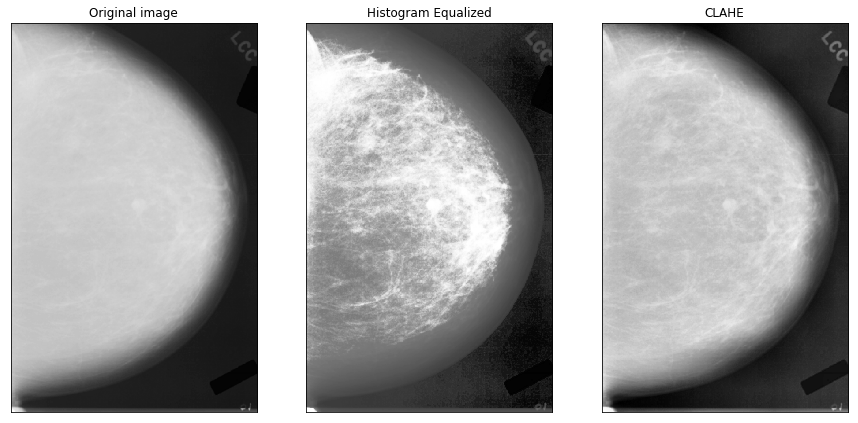

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img1 = cv2.imread('cell.png', 0)
img2 = cv2.imread('mammogram1.png', 0)

# YOUR CODE HERE
img1_equalized = cv2.equalizeHist(img1)
img2_equalized = cv2.equalizeHist(img2)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8, 8))
img1_clahe = clahe.apply(img1)
img2_clahe = clahe.apply(img2)
# END OF YOUR CODE

plt.subplot(131), plt.imshow(img1, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img1_equalized, cmap = 'gray')
plt.title('Histogram Equalized'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img1_clahe, cmap = 'gray')
plt.title('CLAHE'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(131), plt.imshow(img2, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img2_equalized, cmap = 'gray')
plt.title('Histogram Equalized'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img2_clahe, cmap = 'gray')
plt.title('CLAHE'), plt.xticks([]), plt.yticks([])
plt.show()

<h2>Task 3: Noise Filtering</h2>

<strong style="color: red">Programming Task: </strong> Apply a median filter to the screw.png image to remove salt and pepper noise from it.

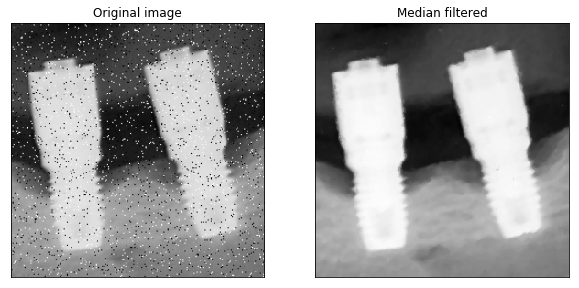

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (10.0, 10.0)
img = cv2.imread('screw.png',0)

# YOUR CODE HERE
img_filtered = cv2.medianBlur(img,5)
# END OF YOUR CODE

plt.imshow(img, cmap = 'gray')
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered, cmap = 'gray')
plt.title('Median filtered'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task: </strong> Apply an averaging filter to the screw.png image.

<strong>Hint: </strong> You can use the <code><a href="https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ones.html">numpy.ones</a></code> and <code><a href="https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html">cv2.filter2D</a></code> functions to convolve the filter kernel over the image.

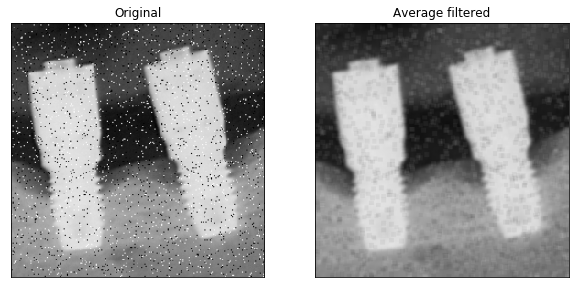

array([[ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04]], dtype=float32)

In [48]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (10.0, 10.0)
img = mpimg.imread('screw.png')

# YOUR CODE HERE
kernel = np.ones((5,5),np.float32)/25
img_filtered = cv2.filter2D(img,-1,kernel)
# END OF YOUR CODE

plt.subplot(121), plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered),plt.title('Average filtered')
plt.xticks([]), plt.yticks([])
plt.show()
kernel

<strong style="color: red;">Programming Task: </strong> Apply a Gaussian blur filter to the images screw.png and mri_noise.png and adjust the parameters as necessary to obtain best results. Find out online which OpenCV function you would have to use. 
How does the applied filtering affect both the noise and the image quality of each image?
In addition, you may also try performing a convolution with a Gaussian filter kernel yourself, as you did in the previous task. Are the obtained results the same?

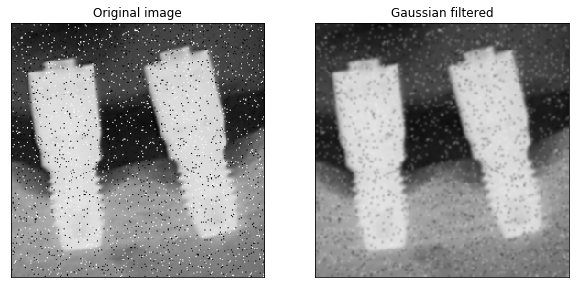

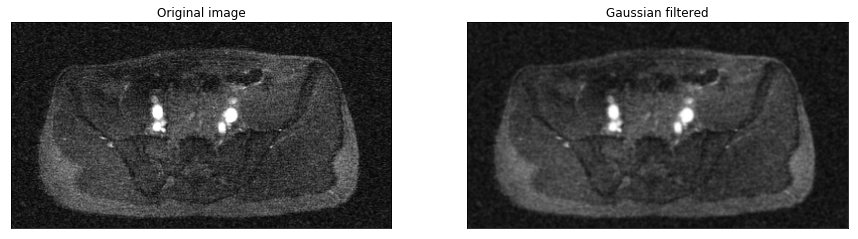

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (10.0, 10.0)
img1 = mpimg.imread('screw.png')
img2 = mpimg.imread('mri_noise.png')

# YOUR CODE HERE
img1_filtered = cv2.GaussianBlur(img1,(5,5),0)
img2_filtered = cv2.GaussianBlur(img2,(9,9),0)

# The result with Gaussian blur look better than with those obtained from simple averaging filtering

# END OF YOUR CODE

plt.imshow(img1, cmap = 'gray')
plt.subplot(121), plt.imshow(img1, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img1_filtered, cmap = 'gray')
plt.title('Gaussian filtered'), plt.xticks([]), plt.yticks([])
plt.show()
pylab.rcParams['figure.figsize'] = (15.0, 15.0)
plt.imshow(img2, cmap = 'gray')
plt.subplot(121), plt.imshow(img2, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2_filtered, cmap = 'gray')
plt.title('Gaussian filtered'), plt.xticks([]), plt.yticks([])
plt.show()